## Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# univariate lstm 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

C:\Users\sagar\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sagar\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sagar\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sagar\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

In [2]:

# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
     # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model 

In [7]:
# Defining the model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
6/6 [==============================] - 1s 235ms/sample - loss: 33876.1523
Epoch 2/300
6/6 [==============================] - 0s 1ms/sample - loss: 33640.3242
Epoch 3/300
6/6 [==============================] - 0s 2ms/sample - loss: 33447.3086
Epoch 4/300
6/6 [==============================] - 0s 1ms/sample - loss: 33235.2617
Epoch 5/300
6/6 [==============================] - 0s 1ms/sample - loss: 32969.7227
Epoch 6/300
6/6 [==============================] - 0s 1ms/sample - loss: 32658.0156
Epoch 7/300
6/6 [==============================] - 0s 998us/sample - loss: 32331.3418
Epoch 8/300
6/6 [==============================] - 0s 3ms/sample - loss: 31972.9219
Epoch 9/300
6/6 [==============================] - 0s 997us/sample - loss: 31577.1309
Epoch 10/300
6/6 [========

Epoch 90/300
6/6 [==============================] - 0s 1ms/sample - loss: 39.3053
Epoch 91/300
6/6 [==============================] - 0s 997us/sample - loss: 50.2349
Epoch 92/300
6/6 [==============================] - 0s 830us/sample - loss: 59.5720
Epoch 93/300
6/6 [==============================] - 0s 2ms/sample - loss: 66.4906
Epoch 94/300
6/6 [==============================] - 0s 997us/sample - loss: 70.4660
Epoch 95/300
6/6 [==============================] - 0s 1ms/sample - loss: 71.3860
Epoch 96/300
6/6 [==============================] - 0s 1ms/sample - loss: 69.4520
Epoch 97/300
6/6 [==============================] - 0s 2ms/sample - loss: 65.0989
Epoch 98/300
6/6 [==============================] - 0s 2ms/sample - loss: 58.9591
Epoch 99/300
6/6 [==============================] - 0s 998us/sample - loss: 51.7020
Epoch 100/300
6/6 [==============================] - 0s 1ms/sample - loss: 44.0000
Epoch 101/300
6/6 [==============================] - 0s 1ms/sample - loss: 36.4836
Epoch 

Epoch 189/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.0473
Epoch 190/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.0390
Epoch 191/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.0307
Epoch 192/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.0227
Epoch 193/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.0149
Epoch 194/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.0073
Epoch 195/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.9998
Epoch 196/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.9925
Epoch 197/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.9851
Epoch 198/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.9779
Epoch 199/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.9705
Epoch 200/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.9631
Epoc

Epoch 288/300
6/6 [==============================] - 0s 996us/sample - loss: 3.7446
Epoch 289/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.6324
Epoch 290/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.6461
Epoch 291/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.5326
Epoch 292/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.4765
Epoch 293/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.3942
Epoch 294/300
6/6 [==============================] - 0s 997us/sample - loss: 3.3584
Epoch 295/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.2964
Epoch 296/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.2138
Epoch 297/300
6/6 [==============================] - 0s 2ms/sample - loss: 3.1508
Epoch 298/300
6/6 [==============================] - 0s 1ms/sample - loss: 3.1580
Epoch 299/300
6/6 [==============================] - 0s 2ms/sample - loss: 3.0863
Epoch 300/30

### Predicting For the next 10 data

In [35]:
# Predicting for next 10 days
from numpy import array
x_input=array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[226.3087]
1 day input [196.         210.         226.30870056]
1 day output [[239.87369]]
2 day input [210.         226.30870056 239.87368774]
2 day output [[256.80035]]
3 day input [226.3087  239.87369 256.80035]
3 day output [[274.72076]]
4 day input [239.87369 256.80035 274.72076]
4 day output [[292.3706]]
5 day input [256.80035 274.72076 292.3706 ]
5 day output [[312.33963]]
6 day input [274.72076 292.3706  312.33963]
6 day output [[333.20615]]
7 day input [292.3706  312.33963 333.20615]
7 day output [[354.89264]]
8 day input [312.33963 333.20615 354.89264]
8 day output [[378.4137]]
9 day input [333.20615 354.89264 378.4137 ]
9 day output [[403.06973]]
[226.3087, 239.87369, 256.80035, 274.72076, 292.3706, 312.33963, 333.20615, 354.89264, 378.4137, 403.06973]


In [36]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [37]:
len(timeseries_data)

9

In [38]:
lst_output

[226.3087,
 239.87369,
 256.80035,
 274.72076,
 292.3706,
 312.33963,
 333.20615,
 354.89264,
 378.4137,
 403.06973]

### Visualizaing The Output

In [42]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

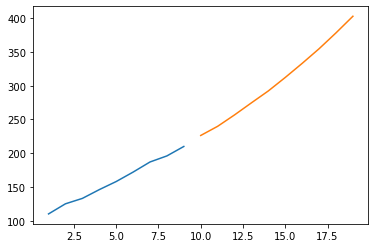

In [44]:
import matplotlib.pyplot as plt
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)